In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
run TP1920.py


In [183]:
# Converter e definir as imagens
#resizeImageAndConvert()

In [184]:
# Ler das imagens para uma matriz 'X' e um array 'lista'
X, lista, size = readImages()
size

42

In [185]:
X[1].shape

(65025,)

In [186]:
X.shape



(42, 65025)

In [187]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 0.8)
eigenvalues

13


array([1.01638662e+09, 6.75305555e+08, 4.81529979e+08, 4.00786491e+08,
       2.99455971e+08, 1.99998005e+08, 1.51083704e+08, 1.36557695e+08,
       1.20666991e+08, 1.09488920e+08, 9.99227522e+07, 9.24705905e+07,
       8.44901317e+07, 7.52130367e+07, 7.03572773e+07, 6.65665210e+07,
       6.19411005e+07, 6.11410232e+07, 5.62410457e+07, 5.42459925e+07,
       5.17788877e+07, 4.68836932e+07, 4.33441600e+07, 3.88751770e+07,
       3.49446062e+07, 3.11055110e+07, 3.06747179e+07, 2.94775941e+07,
       2.64715762e+07, 2.60912540e+07, 2.25920955e+07, 1.98586646e+07,
       1.77353067e+07, 1.75836047e+07, 1.59611195e+07, 1.45279774e+07,
       1.34677684e+07, 1.29926785e+07, 1.20295624e+07, 9.37323630e+06,
       5.28649087e+06, 1.41788964e-22])

41


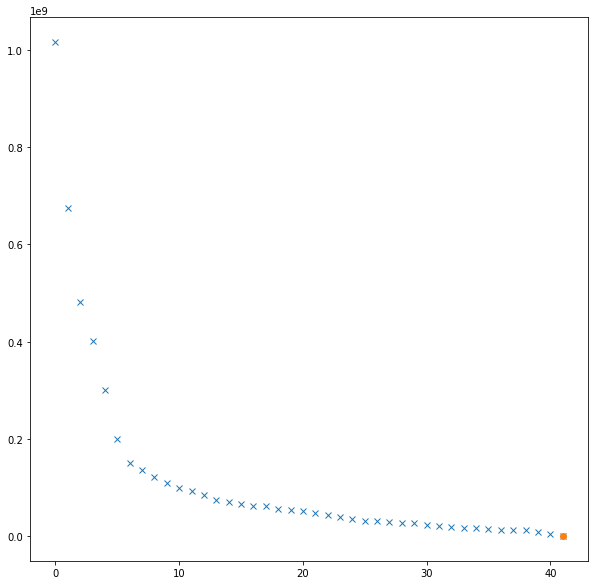

In [188]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 1)
# Alterar nome da variável
ponto=eigenvalues
# Obter o gráfico do cotovelo
plt.figure(figsize=(10,10))
t = np.arange(0, size, 1)
plt.plot(t, eigenvalues, 'x')
plt.plot(np.argmin(ponto), eigenvalues[np.argmin(ponto)], 'o')
plt.show()

In [189]:
eigenvectors.T[0]

array([-0.00217717, -0.00217424, -0.00216338, ...,  0.00504805,
        0.00525317,  0.00525773])

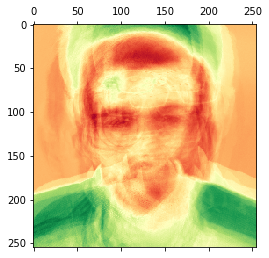

In [190]:
# Exemplo de uma eigenface do dataset
display(plt.matshow(np.reshape(eigenvectors.T[0], (255,255)), cmap=plt.cm.RdYlGn))

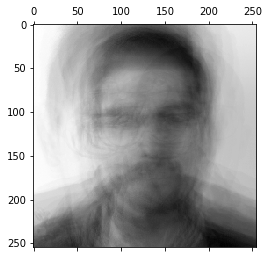

In [191]:
# Exemplo da "cara média" do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap='gray'))

In [192]:
# Obter os coeficientes das projeccoes das eigenfaces
coef_proj = coefProj(phi, eigenvectors, X.shape[0])
coef_proj

[array([ 2.46659131e+03,  2.13301158e+03,  5.28431120e+03, -3.13349963e+02,
         4.32726456e+03, -4.57860863e+03,  1.01319017e+03, -3.08814885e+02,
         2.09779377e+01, -8.99646444e+02,  2.13915711e+03, -7.61278962e+02,
         2.58983319e+02,  2.33434588e+03, -9.10314855e+02, -6.31935622e+02,
         6.91252923e+02,  2.48113487e+02,  6.83252695e+02,  8.89857382e+02,
         1.14438881e+03, -1.14140713e+03, -2.38471541e+03,  8.58380761e+02,
         2.50317437e+03, -6.82567983e+02, -9.89873397e+02, -1.56493350e+03,
         6.12774101e+02,  1.94131291e+02,  3.37536378e+02,  2.20391777e+01,
         7.83571233e+01,  3.56336470e+02, -3.11278984e+00, -3.02157104e+02,
        -4.29388386e+01, -3.74754689e+01,  1.71880088e+01,  5.93574641e+01,
        -5.38495355e+01]),
 array([ 1.39092971e+02,  4.64766920e+03,  1.70881527e+03, -1.61629418e+03,
         3.31049284e+03,  4.32332845e+03, -2.89330783e+02, -2.09729393e+03,
        -3.49042176e+02, -2.60768465e+02, -1.08190274e+03,  1

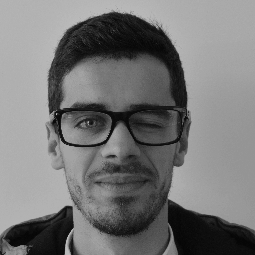

In [206]:
# Imagem para teste
input_img = Image.open('TestSet/bruno_oculos_wink.gif').convert('L')
input_img

Imagem nr.: 0
Distancia minima: -1
Distancia máxima: -1



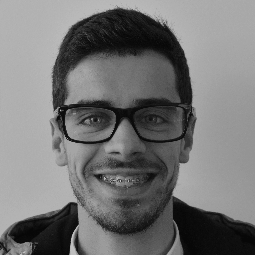

In [208]:
# Teste do reconhecimento
dist, test_coef_proj = testar(input_img, mean, eigenvectors, eigenvalues, X.shape[0], coef_proj, 'mahalanobis')
image = 0
if np.size(dist) > 0 : 
    image = lista[np.argmin(dist)]
image

In [209]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
#distance = np.sum( np.divide((coef_proj[:,4]-test_coef_proj)**2, eigenvalues[:eigenvectors.shape[1]]) )
#distance

In [199]:
def mahalanobis(x, y, eigenvalues, k):
    if x.shape[0] != y.shape[0]:
        return (-1)
    N = x.shape[1]
    distance=[0]*N
    for i in range(N):
        distance[i] = [np.sum(np.divide((x[:,i]-y)**2, eigenvalues[:k]))]
    return distance

In [350]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
dist = mahalanobis(coef_proj, test_coef_proj, eigenvalues, eigenvectors.shape[1])
distanceMahalanobis = np.sum(dist)
distanceMahalanobis

200.80419063685375

In [186]:
# Conclusoes: nao consegue reconhecer quando tem uma luz de lado. Caso contrario, faz bem o reconhecimento.